In [3]:
import sys
sys.path.append('../')
from config_sing import *

You are on Duke Server: Singularity: Proj CombEffect
BASE DIRECTORY:     /mount/work
PATH OF SOURCE:     /mount/work/source
PATH OF EXECUTABLE: /mount/work/exe
PATH OF ANNOTATION: /mount/work/annotation
PATH OF PROJECT:    /mount/project
PATH OF RESULTS:    /mount/work/out/proj_combeffect


In [4]:
import sqlite3
import itertools as it
from collections import defaultdict
from sklearn.manifold import TSNE

SAMPLE
- sample    TEXT PRIMARY KEY, 
- treatment TEXT,
- size      INTEGER

Motif
- binding TEXT PRIMARY KEY, 
- chrom   TEXT,
- start   INTEGER,
- end     INTEGER,
- motif   TEXT,
- score   REAL

Fragment(
- fragment TEXT PRIMARY KEY, 
- chrom    TEXT,
- start    INTEGER,
- end      INTEGER,
- pct_at   REAL,
- pct_gc   REAL,
- num_A    INTEGER,
- num_C    INTEGER,
- num_G    INTEGER,
- num_T    INTEGER,
- num_N    INTEGER,
- num_oth  INTEGER
    
Annotation
- fragment TEXT, 
- binding  TEXT,
- score    REAL,
- FOREIGN KEY (fragment) REFERENCES Fragment (fragment),
- FOREIGN KEY (binding)  REFERENCES Motif    (binding)

### Given a sample, output some fragments

In [33]:
query_out = """SELECT c.fragment, c.sample, c.count FROM Count c
WHERE c.sample = 'Input1' LIMIT 10
"""

In [35]:
fdiry = os.path.join(FD_RES, 'database')
fname = "fragment.db"
fpath_db = os.path.join(fdiry, fname)

with sqlite3.connect(fpath_db) as conn:
    query  = query_out
    cursor = conn.cursor()
    result = cursor.execute(query)
    
    #row = cursor.fetchone()
    #print(row)
    #rows = cursor.fetchall()
    #print(len(rows))
    
    for idx, row in enumerate(result):
        ### parse data
        #frag, sam, count, score = row
        print(row)

('chr17_8148117_8149012', 'Input1', 1)
('chr17_8148122_8149107', 'Input1', 1)
('chr17_8148178_8149194', 'Input1', 1)
('chr17_8148188_8149154', 'Input1', 1)
('chr17_8148190_8149151', 'Input1', 1)
('chr17_8148220_8149108', 'Input1', 1)
('chr17_8148280_8149232', 'Input1', 1)
('chr17_8148401_8149372', 'Input1', 1)
('chr17_8148548_8149585', 'Input1', 1)
('chr17_8148913_8149953', 'Input1', 1)


### Given a single fragment, get all the motif bindings

In [48]:
frag = 'chr17_8148117_8149012'

In [49]:
query_out = (f"""SELECT a.fragment, m.chrom, m.start, m.end, m.motif, m.score
FROM Annotation a
JOIN Motif      m ON a.binding = m.binding
WHERE a.fragment = '{frag}'
;""")

In [50]:
print(query_out)

SELECT a.fragment, m.chrom, m.start, m.end, m.motif, m.score
FROM Annotation a
JOIN Motif      m ON a.binding = m.binding
WHERE a.fragment = 'chr17_8148117_8149012'
;


In [52]:
fdiry = os.path.join(FD_RES, 'database')
fname = "fragment.db"
fpath_db = os.path.join(fdiry, fname)

with sqlite3.connect(fpath_db) as conn:
    query  = query_out
    cursor = conn.cursor()
    cursor.execute(query)
    
    #row = cursor.fetchone()
    #print(row)
    
    rows = cursor.fetchall()
    print(len(rows))

1060


In [53]:
rows[:5]

[('chr17_8148117_8149012', 'chr17', 8148123, 8148133, 'GLI', 7.4318),
 ('chr17_8148117_8149012', 'chr17', 8148124, 8148139, 'NR/17', 7.8649),
 ('chr17_8148117_8149012', 'chr17', 8148126, 8148137, 'KLF/SP/1', 11.3678),
 ('chr17_8148117_8149012', 'chr17', 8148129, 8148147, 'REST/NRSF', 4.8708),
 ('chr17_8148117_8149012', 'chr17', 8148132, 8148142, 'CREB/ATF/2', 7.1033)]

In [54]:
rows[-5:]

[('chr17_8148117_8149012', 'chr17', 8148973, 8148987, 'NR/3', 7.3343),
 ('chr17_8148117_8149012', 'chr17', 8148974, 8148991, 'PAX/2', 9.4711),
 ('chr17_8148117_8149012', 'chr17', 8148980, 8148991, 'ZNF524', 6.8894),
 ('chr17_8148117_8149012', 'chr17', 8148988, 8149000, 'GRHL', 8.856),
 ('chr17_8148117_8149012', 'chr17', 8149001, 8149012, 'YY1', 6.9956)]

In [60]:
1060/212

5.0

In [55]:
len(rows)

1060

In [56]:
len(set(rows))

212

In [58]:
rows[205:212]

[('chr17_8148117_8149012', 'chr17', 8148970, 8148980, 'CREB/ATF/1', 8.2749),
 ('chr17_8148117_8149012', 'chr17', 8148973, 8148987, 'NR/13', 9.3427),
 ('chr17_8148117_8149012', 'chr17', 8148973, 8148987, 'NR/3', 7.3343),
 ('chr17_8148117_8149012', 'chr17', 8148974, 8148991, 'PAX/2', 9.4711),
 ('chr17_8148117_8149012', 'chr17', 8148980, 8148991, 'ZNF524', 6.8894),
 ('chr17_8148117_8149012', 'chr17', 8148988, 8149000, 'GRHL', 8.856),
 ('chr17_8148117_8149012', 'chr17', 8149001, 8149012, 'YY1', 6.9956)]

In [59]:
rows[212:219]

[('chr17_8148117_8149012', 'chr17', 8148123, 8148133, 'GLI', 7.4318),
 ('chr17_8148117_8149012', 'chr17', 8148124, 8148139, 'NR/17', 7.8649),
 ('chr17_8148117_8149012', 'chr17', 8148126, 8148137, 'KLF/SP/1', 11.3678),
 ('chr17_8148117_8149012', 'chr17', 8148129, 8148147, 'REST/NRSF', 4.8708),
 ('chr17_8148117_8149012', 'chr17', 8148132, 8148142, 'CREB/ATF/2', 7.1033),
 ('chr17_8148117_8149012', 'chr17', 8148132, 8148142, 'CREB/ATF/3', 7.017),
 ('chr17_8148117_8149012', 'chr17', 8148133, 8148142, 'CREB/ATF/1', 7.7524)]

In [70]:
cnames = ["Fragment", "Motif", "Score"]
ctypes = [np.str, np.str, np.float]
dat = pd.DataFrame(rows, columns=cnames).astype({k:v for k, v in zip(cnames, ctypes)})
dat = dat.groupby('Motif').sum()
dat.shape

(102, 1)

In [32]:
dat.groupby('Motif').sum().Score.to_dict()

{'CREB/ATF/1': 7.7524,
 'CREB/ATF/2': 7.1033,
 'CREB/ATF/3': 7.017,
 'GLI': 7.4318,
 'KLF/SP/1': 11.3678,
 'KLF/SP/2': 7.6693,
 'NR/17': 7.8649,
 'NR/3': 8.8725,
 'REST/NRSF': 4.8708,
 'ZNF324': 10.1365}

**Test another way to query**

In [29]:
frag = 'chr17_8148117_8149012'
chrom, start, end = frag.split("_")

In [44]:
query_out = (f"""SELECT m.chrom, m.start, m.end, m.motif, m.score
FROM Motif m
WHERE m.start >= {start} AND m.end <= {end}
;""")
print(query_out)

SELECT m.chrom, m.start, m.end, m.motif, m.score
FROM Motif m
WHERE m.start >= 8148117 AND m.end <= 8149012
;


In [45]:
fdiry = os.path.join(FD_RES, 'database')
fname = "fragment.db"
fpath_db = os.path.join(fdiry, fname)

with sqlite3.connect(fpath_db) as conn:
    query  = query_out
    cursor = conn.cursor()
    cursor.execute(query)
    
    #row = cursor.fetchone()
    #print(row)
    
    rows = cursor.fetchall()
    print(len(rows))

212


In [46]:
rows[:5]

[('chr17', 8148123, 8148133, 'GLI', 7.4318),
 ('chr17', 8148124, 8148139, 'NR/17', 7.8649),
 ('chr17', 8148126, 8148137, 'KLF/SP/1', 11.3678),
 ('chr17', 8148129, 8148147, 'REST/NRSF', 4.8708),
 ('chr17', 8148132, 8148142, 'CREB/ATF/2', 7.1033)]

In [47]:
rows[-5:]

[('chr17', 8148973, 8148987, 'NR/3', 7.3343),
 ('chr17', 8148974, 8148991, 'PAX/2', 9.4711),
 ('chr17', 8148980, 8148991, 'ZNF524', 6.8894),
 ('chr17', 8148988, 8149000, 'GRHL', 8.856),
 ('chr17', 8149001, 8149012, 'YY1', 6.9956)]

In [35]:
query_out = (f"""SELECT a.fragment, a.binding
FROM Annotation a
WHERE a.fragment = '{frag}'
;""")

In [36]:
fdiry = os.path.join(FD_RES, 'database')
fname = "fragment.db"
fpath_db = os.path.join(fdiry, fname)

with sqlite3.connect(fpath_db) as conn:
    query  = query_out
    cursor = conn.cursor()
    cursor.execute(query)
    
    #row = cursor.fetchone()
    #print(row)
    
    rows = cursor.fetchall()
    print(len(rows))

1060


In [37]:
rows[:5]

[('chr17_8148117_8149012', 'chr17_8148123_8148133_GLI'),
 ('chr17_8148117_8149012', 'chr17_8148124_8148139_NR/17'),
 ('chr17_8148117_8149012', 'chr17_8148126_8148137_KLF/SP/1'),
 ('chr17_8148117_8149012', 'chr17_8148129_8148147_REST/NRSF'),
 ('chr17_8148117_8149012', 'chr17_8148132_8148142_CREB/ATF/2')]

### Given multiple fragments, get annotation table

In [99]:
def gen_frag(sample):
    ### set query
    query_out = f"""
        SELECT c.fragment, f.start, f.end, f.pct_gc FROM Count c
        JOIN   Fragment f ON c.fragment = f.fragment
        WHERE  c.sample = '{sample}'
        """
    
    ### file path of database
    fdiry = os.path.join(FD_RES, 'database')
    fname = "fragment.db"
    fpath_db = os.path.join(fdiry, fname)

    ### query out fragments from the sample
    with sqlite3.connect(fpath_db) as conn:
        query  = query_out
        cursor = conn.cursor()
        rows   = cursor.execute(query)
        for row in rows:
            frag, start, end, pct_gc = row
            yield (frag, end-start, pct_gc)

In [98]:
def get_annot(frag):
    ### set query
    query_out = f"""
        SELECT a.fragment, m.motif, m.score
        FROM Annotation a
        JOIN Motif      m ON a.binding = m.binding
        WHERE a.fragment = '{frag}'
        ;"""
    
    ### file path of database
    fdiry = os.path.join(FD_RES, 'database')
    fname = "fragment.db"
    fpath_db = os.path.join(fdiry, fname)

    ### query out motif bindings on the fragment
    dct = defaultdict(lambda: 0)
    with sqlite3.connect(fpath_db) as conn:
        query  = query_out
        cursor = conn.cursor()
        rows   = cursor.execute(query)
        
        for row in rows:
            ### parse info
            frag, motif, score = row
            
            ### sum the scores with same motifs
            dct[motif] += score
            
    return dct

In [102]:
N   = 5
gen = gen_frag("Input1")
gen = it.islice(gen, N)
for row in gen:
    print(row)

('chr17_8148117_8149012', 895, 0.576536)
('chr17_8148122_8149107', 985, 0.571574)
('chr17_8148178_8149194', 1016, 0.568898)
('chr17_8148188_8149154', 966, 0.572464)
('chr17_8148190_8149151', 961, 0.572321)


In [103]:
N   = 100
gen = gen_frag("Input1")
gen = it.islice(gen, N)
tmp = list(gen)
print(len(tmp))

100


In [105]:
N   = 5
gen = gen_frag("Input1")
gen = it.islice(gen, N)
lst = list()

for row in gen:
    frag, length, pct_gc = row
    dct = get_annot(frag)
    lst.append(dct)
    print(row, len(dct))

('chr17_8148117_8149012', 895, 0.576536) 102
('chr17_8148122_8149107', 985, 0.571574) 110
('chr17_8148178_8149194', 1016, 0.568898) 111
('chr17_8148188_8149154', 966, 0.572464) 106
('chr17_8148190_8149151', 961, 0.572321) 106


In [108]:
dat = pd.DataFrame(lst).fillna(0)
dat.shape

(5, 115)

In [109]:
N   = 1000
gen = gen_frag("Input1")
gen = it.islice(gen, N)
lst = list()

for row in gen:
    frag, length, pct_gc = row
    dct = get_annot(frag)
    lst.append(dct)
    print(row, len(dct))

('chr17_8148117_8149012', 895, 0.576536) 102
('chr17_8148122_8149107', 985, 0.571574) 110
('chr17_8148178_8149194', 1016, 0.568898) 111
('chr17_8148188_8149154', 966, 0.572464) 106
('chr17_8148190_8149151', 961, 0.572321) 106
('chr17_8148220_8149108', 888, 0.566441) 102
('chr17_8148280_8149232', 952, 0.556723) 110
('chr17_8148401_8149372', 971, 0.549949) 115
('chr17_8148548_8149585', 1037, 0.584378) 126
('chr17_8148913_8149953', 1040, 0.585577) 122
('chr17_8149040_8149982', 942, 0.591295) 113
('chr17_8149115_8150060', 945, 0.6) 117
('chr17_8149204_8150156', 952, 0.59979) 121
('chr17_8149218_8150168', 950, 0.605263) 118
('chr17_8149267_8150180', 913, 0.608981) 115
('chr17_8149351_8150361', 1010, 0.612871) 115
('chr17_8149418_8150427', 1009, 0.612488) 110
('chr17_8149468_8150589', 1121, 0.606601) 113
('chr17_8149606_8150634', 1028, 0.607004) 106
('chr17_8149661_8150552', 891, 0.603816) 99
('chr17_8149759_8150629', 870, 0.605747) 98
('chr17_8149760_8150629', 869, 0.606444) 98
('chr17_8149

In [116]:
dat = pd.DataFrame(lst).fillna(0)
print(dat.shape)
dat.head()

(100, 212)


,GLI,NR/17,KLF/SP/1,REST/NRSF,CREB/ATF/2,CREB/ATF/3,CREB/ATF/1,NR/3,ZNF324,KLF/SP/2,...,NFAT/1,Ebox/CATATG,CUX/1,FOX/2,CPEB1,HD/10,SPDEF/2,SIX/2,BCL6/1,ZNF490
0,126.6885,130.8105,322.06125,112.7325,35.5165,35.085,80.1365,444.91425,145.6805,482.127625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,76.0131,78.4863,225.96735,81.4860,21.3099,21.051,48.0819,266.94855,87.4083,344.245275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,53.7177,39.7128,191.86395,66.8736,0.0000,0.000,24.8247,263.86845,81.9693,349.480275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53.7177,39.7128,191.86395,66.8736,0.0000,0.000,24.8247,263.86845,81.9693,349.480275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,107.4354,79.4256,383.72790,133.7472,0.0000,0.000,49.6494,527.73690,163.9386,698.960550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
X = dat.to_numpy()
X.shape

(100, 212)

In [119]:
X_emb = TSNE(n_components=2).fit_transform(X)
X_emb.shape

(100, 2)

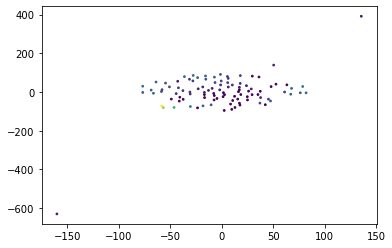

In [127]:
plt.scatter(X_emb[:,0], X_emb[:,1], s=3, c=dat.loc[:,"NR/20"])

In [58]:
gen_annot('chr17_8148117_8149012')

('chr17_8148117_8149012', 'GLI', 7.4318)
('chr17_8148117_8149012', 'NR/17', 7.8649)
('chr17_8148117_8149012', 'KLF/SP/1', 11.3678)
('chr17_8148117_8149012', 'REST/NRSF', 4.8708)
('chr17_8148117_8149012', 'CREB/ATF/2', 7.1033)
('chr17_8148117_8149012', 'CREB/ATF/3', 7.017)


In [ ]:
query_out = """SELECT c.fragment, c.sample, c.count FROM Count c
WHERE c.sample = 'Input1' LIMIT 10
"""

In [23]:
query_out = """SELECT c.fragment, c.sample, c.count FROM Count c
WHERE c.sample = 'Input1' 
ORDER BY RANDOM(123) LIMIT 10
"""

In [76]:
dct = defaultdict(lambda: 0)
dct[1]

0

In [24]:
fdiry = os.path.join(FD_RES, 'database')
fname = "fragment.db"
fpath_db = os.path.join(fdiry, fname)

with sqlite3.connect(fpath_db) as conn:
    query  = query_out
    cursor = conn.cursor()
    cursor.execute(query)
    
    #row = cursor.fetchone()
    #print(row)
    
    rows = cursor.fetchall()
    print(len(rows))
    for idx, row in enumerate(rows):
        ### parse data
        #frag, sam, count, score = row
        print(row)

OperationalError: wrong number of arguments to function RANDOM()